In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.head()


,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


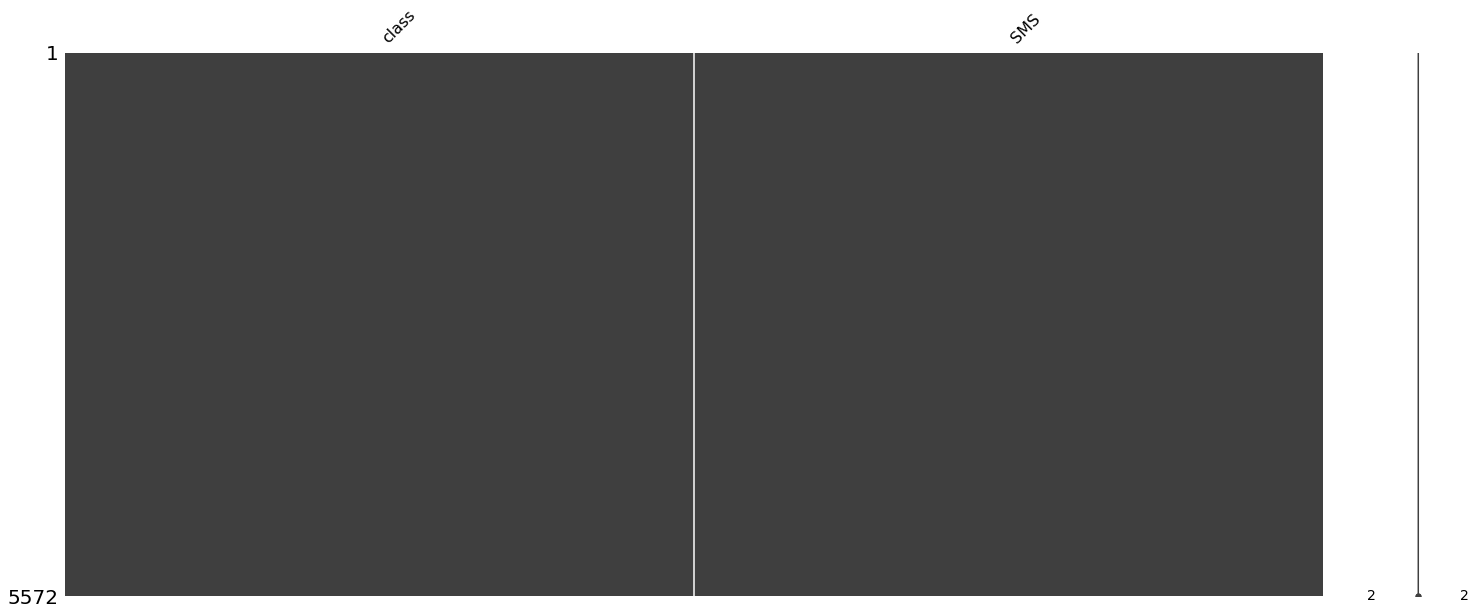

In [6]:
import missingno as msno
msno.matrix(data)

In [7]:
data.tail()

,class,SMS
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [8]:
data.describe(include = 'all')

,class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
data.shape

(5572, 2)

In [10]:
data.keys()

Index(['class', 'SMS'], dtype='object')

In [20]:
x=data.duplicated()
print(x.value_counts())

False    5169
True      403
dtype: int64


In [26]:
data.loc[data.duplicated(), :].head(10)

,class,SMS
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
338,ham,"Sorry, I'll call later"
356,spam,Congratulations ur awarded 500 of CD vouchers ...
443,ham,"Sorry, I'll call later"
532,ham,Gudnite....tc...practice going on
654,ham,Did u got that persons story


In [28]:
new_data = data.drop_duplicates()
print(new_data.duplicated().value_counts())

False    5169
dtype: int64


In [29]:
new_data['class'].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

In [54]:
new_data.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
ham_data = new_data[new_data['class'] == 'ham']

spam_data = new_data[new_data['class'] == 'spam']

print(ham_data.shape)

print(spam_data.shape)

(4516, 2)
(653, 2)


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
ham_vect = CountVectorizer(stop_words='english')

spam_vect = CountVectorizer(stop_words='english')

ham_dtm = ham_vect.fit_transform(ham_data['SMS'])

spam_dtm = spam_vect.fit_transform(spam_data['SMS'])



In [40]:
ham_word = ham_vect.get_feature_names()
ham_freqs = ham_dtm.sum(axis=0).A1
ham_result = dict(zip(ham_word, ham_freqs))
print(len(ham_word))

6589


In [41]:
spam_word = spam_vect.get_feature_names()
spam_freqs = spam_dtm.sum(axis=0).A1
spam_result = dict(zip(spam_word, spam_freqs))
print(len(spam_word))

2699


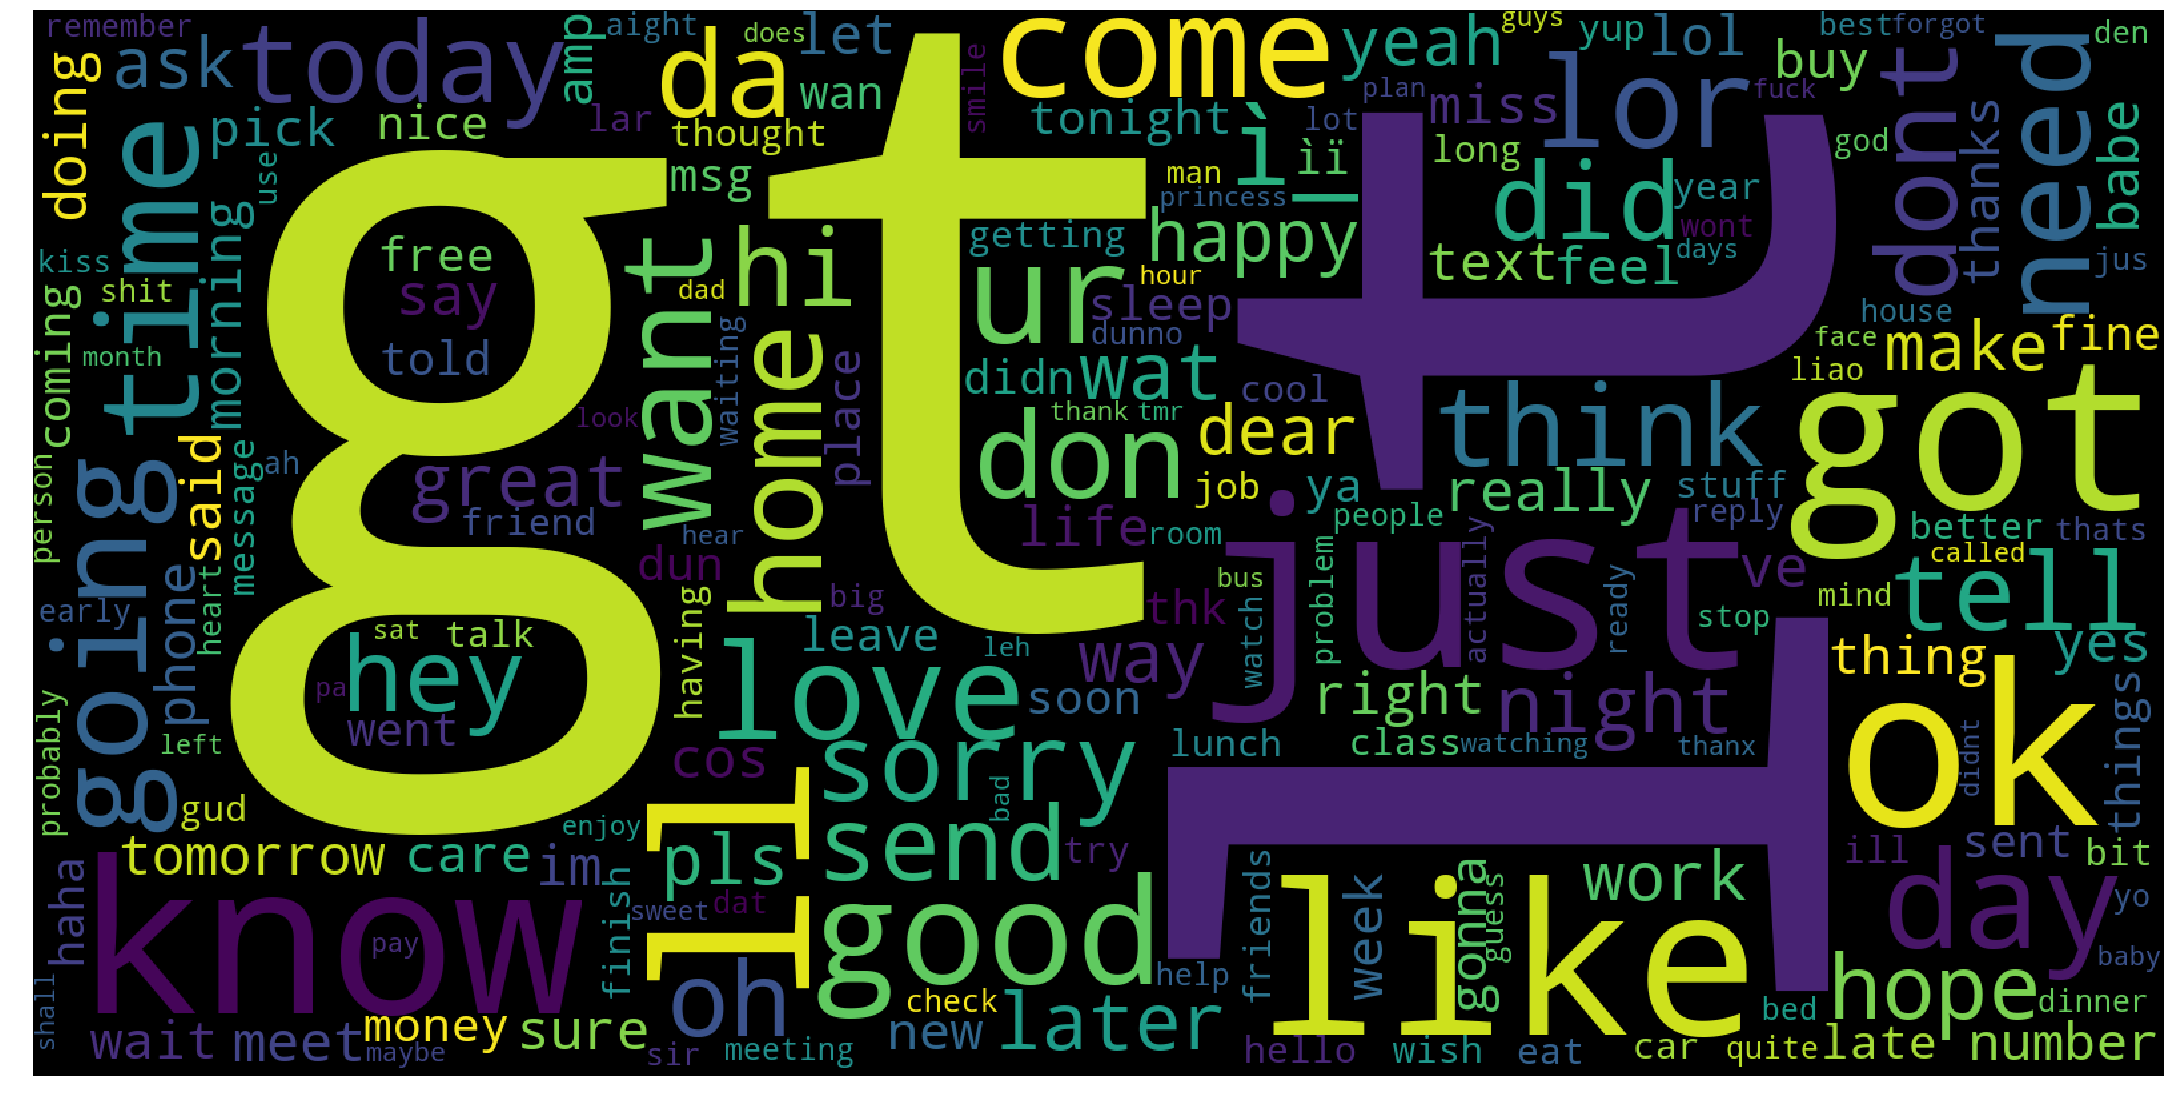

In [44]:
from wordcloud import WordCloud

#Initializing WordCloud using frequencies of tags.
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(ham_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("ham_word_cloud.png")
plt.show()

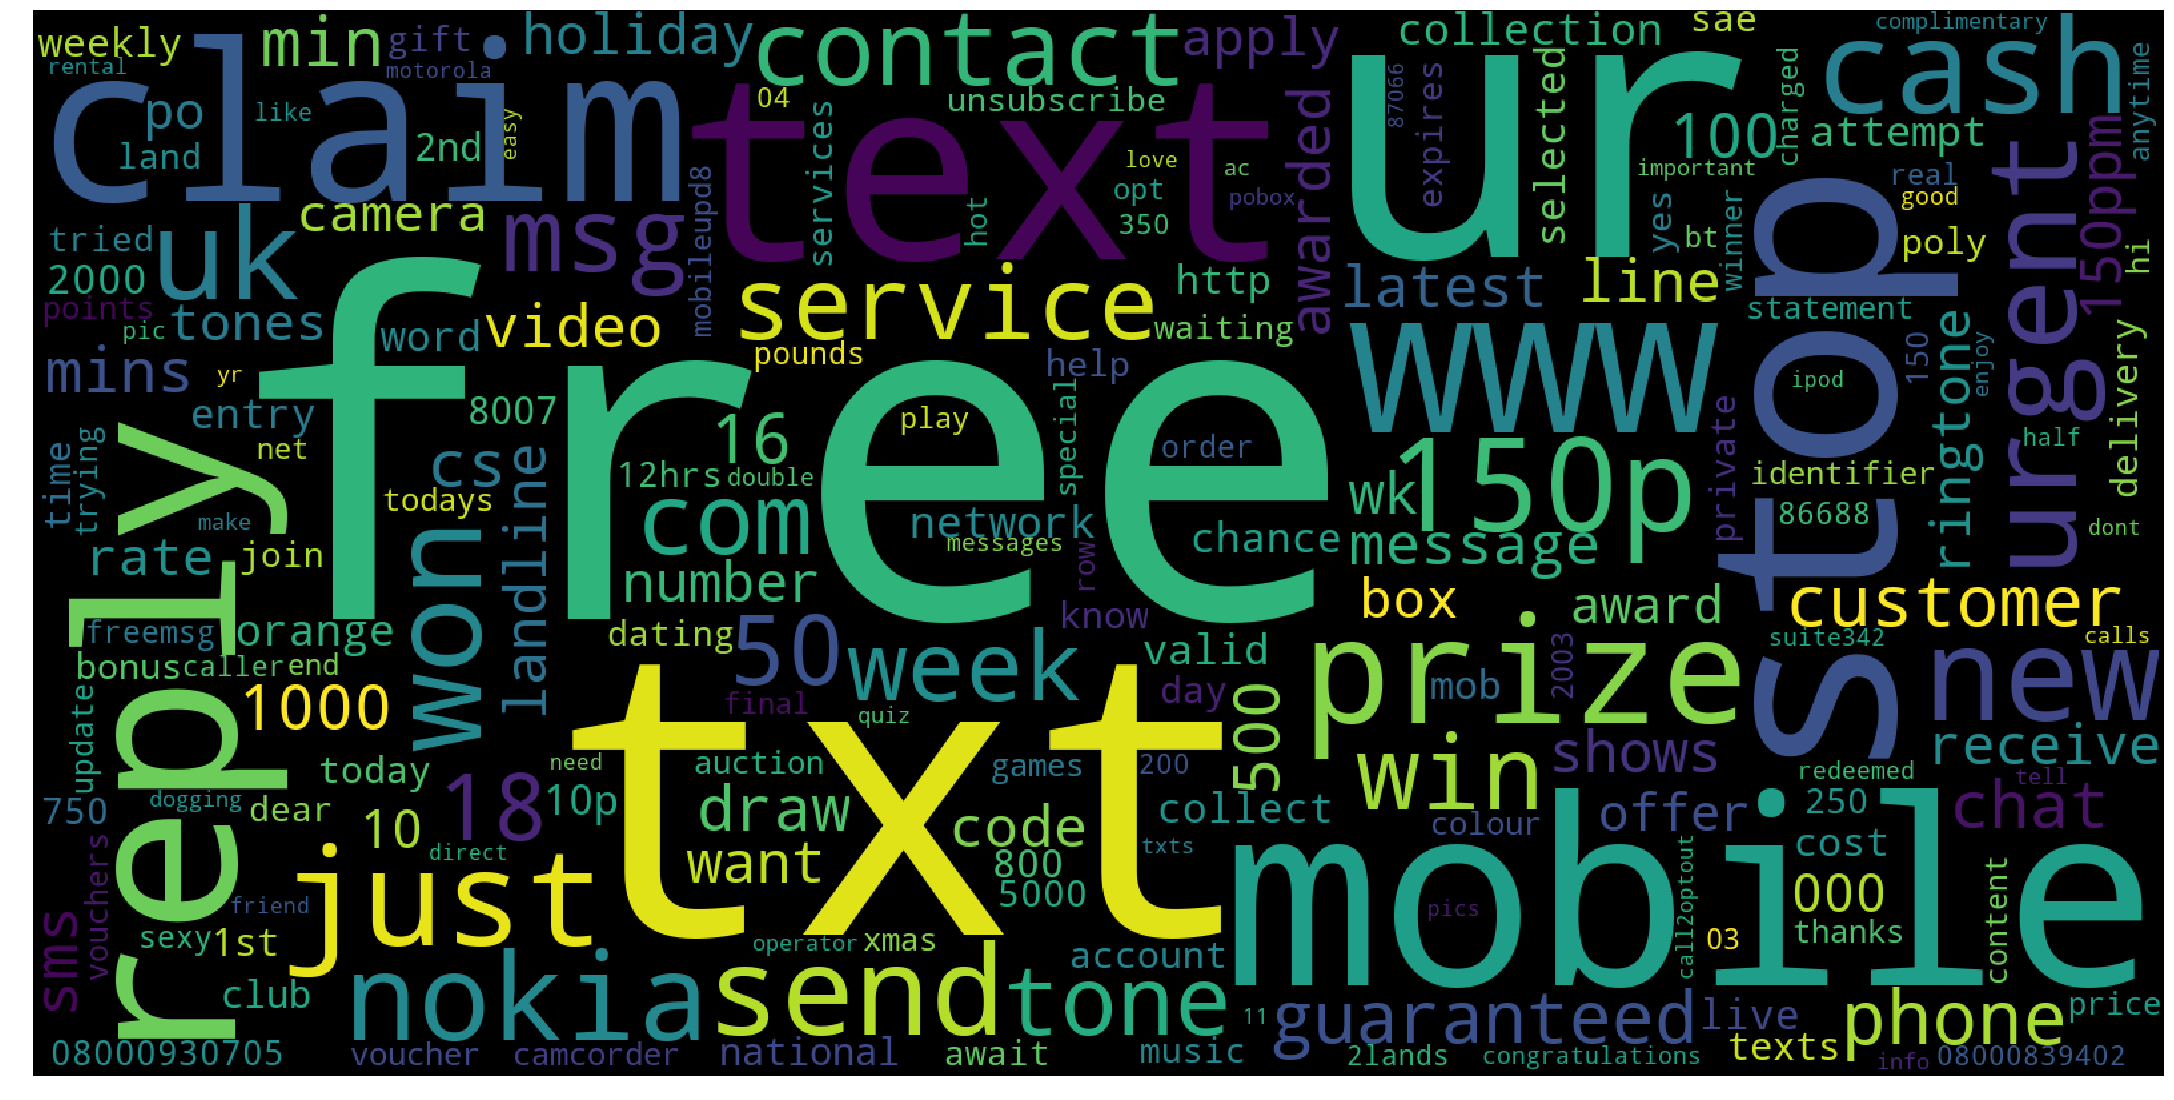

In [45]:
wordcloud = WordCloud(    background_color='black',
                          width=1600,
                          height=800,
                    ).generate_from_frequencies(spam_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("spam_word_cloud.png")
plt.show()

## UNIVARIANT VISUALIZATION

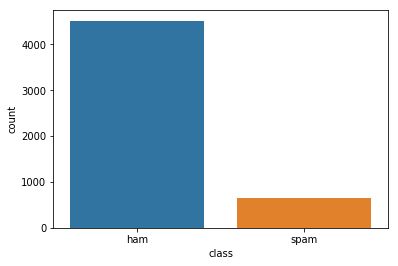

In [59]:
sns.countplot(x='class',  data = new_data )

## Tf-Idf

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
dtm1 = tf.fit_transform(data['SMS'])

print(tf.vocabulary_)

{'go': 3550, 'until': 8030, 'jurong': 4350, 'point': 5920, 'crazy': 2327, 'available': 1303, 'only': 5537, 'in': 4087, 'bugis': 1751, 'great': 3634, 'world': 8489, 'la': 4476, 'buffet': 1749, 'cine': 2048, 'there': 7645, 'got': 3594, 'amore': 1069, 'wat': 8267, 'ok': 5504, 'lar': 4512, 'joking': 4318, 'wif': 8392, 'oni': 5533, 'free': 3358, 'entry': 2949, 'wkly': 8447, 'comp': 2165, 'to': 7756, 'win': 8405, 'fa': 3087, 'cup': 2386, 'final': 3207, 'tkts': 7743, '21st': 411, 'may': 4930, '2005': 402, 'text': 7595, '87121': 784, 'receive': 6297, 'question': 6190, 'std': 7230, 'txt': 7933, 'rate': 6242, 'apply': 1156, '08452810075over18': 77, 'dun': 2802, 'say': 6633, 'so': 7024, 'early': 2823, 'hor': 3927, 'already': 1042, 'then': 7640, 'nah': 5238, 'don': 2712, 'think': 7660, 'he': 3781, 'goes': 3558, 'usf': 8075, 'lives': 4665, 'around': 1207, 'here': 3831, 'though': 7680, 'freemsg': 3365, 'hey': 3841, 'darling': 2443, 'it': 4218, 'been': 1460, 'week': 8313, 'now': 5420, 'and': 1084, 'n

In [121]:
sms_data_array = dtm1.toarray()
print(sms_data_array)
print('Size of new array')

print(sms_data_array.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Size of new array
(5572, 8672)


In [131]:
data['class'] = data['class'].replace('ham', 1)
data['class'] = data['class'].replace('spam', 0)

In [133]:
data['class'].head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

## PCA

In [123]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(sms_data_array)
pca_data = pca.transform(sms_data_array)
main_data = pd.DataFrame(data = pca_data, columns=['component 1', 'component 2'])
#main_data.append(y_train)
main_data.head()


,component 1,component 2
0,-0.057308,-0.025152
1,-0.187973,-0.081901
2,-0.026184,-0.011925
3,-0.082267,-0.045951
4,-0.012759,-0.029591


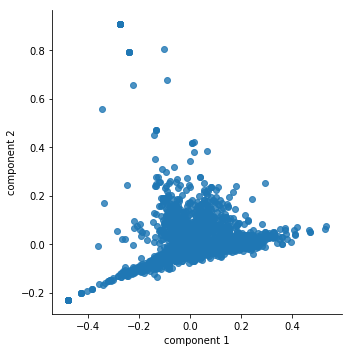

In [124]:
sns.lmplot('component 1', 'component 2', data = main_data, fit_reg = False,)
plt.show()

## Split Data

In [134]:
x = sms_data_array
y = data['class']

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 2, test_size = 0.20, random_state = 0)
sss.get_n_splits(x,y)


2

In [135]:
for train_index, test_index in sss.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]


TRAIN: [1523 1603 3914 ... 5345  567 1958] TEST: [1589 5169  365 ... 1842 1186 2478]
TRAIN: [1914  997 1427 ... 2847 5011 2315] TEST: [5405 3539 1056 ... 4837 1980  424]


In [136]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457,)
(1115,)


# Classification 

## Logistic regression

In [149]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
pr_lr = lr.predict(x_test)

In [150]:
logistic_score = lr.score(x_test, y_test)
print(logistic_score)

0.9587443946188341


In [151]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, pr_lr))
print(classification_report(y_test, pr_lr))

[[105  44]
 [  2 964]]
             precision    recall  f1-score   support

          0       0.98      0.70      0.82       149
          1       0.96      1.00      0.98       966

avg / total       0.96      0.96      0.96      1115



## KNN

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors  = 3)
knn.fit(x_train, y_train)
pr_knn = knn.predict(x_test)

In [153]:
knn_score = knn.score(x_test, y_test)
print(knn_score)

0.9237668161434978


In [154]:
print(confusion_matrix(y_test, pr_knn))
print(classification_report(y_test, pr_knn))


[[ 64  85]
 [  0 966]]
             precision    recall  f1-score   support

          0       1.00      0.43      0.60       149
          1       0.92      1.00      0.96       966

avg / total       0.93      0.92      0.91      1115



## Naive Bayes